In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

TODO: consolidate functions, could be less.

For all graphs : I want raw, fraction, & ratio. 

Note:

PLS=promoter

dELS=distal enhancer

pELS=proximal enhancer

(See project readme for more information.)

In [31]:
genome_regions=["is_in_PLS","is_in_dELS","is_in_pELS"]

## PhyloP VS rarity

In [32]:
data_base_path="/home/mcn26/varef/scripts/noon_data/2.count/"

In [33]:
# Load the data into a pandas DataFrame
path=glob.glob(data_base_path+"phylop_count_table/*.csv")[0]
df = pd.read_csv(path)

In [34]:
df

,category,phylop_significant,is_in_dELS,is_in_CA,is_in_pELS,is_in_CA-H3K4me3,is_in_CA-CTCF,is_in_PLS,is_in_TF,is_in_CA-TF,count
0,ULTRARARE,False,True,False,False,False,False,False,False,False,563773
1,RARE,False,True,False,False,False,False,False,False,False,98414
2,LOW_FREQ,True,False,False,True,False,False,False,False,False,606
3,SINGLETON,True,False,False,False,False,False,False,False,True,403
4,RARE,False,False,False,False,False,False,False,False,True,1365
...,...,...,...,...,...,...,...,...,...,...,...
93,MAF_OR_AC_IS_ZERO,False,False,True,False,False,False,False,False,False,3
94,MAF_OR_AC_IS_ZERO,False,False,False,False,False,True,False,False,False,2
95,MAF_OR_AC_IS_ZERO,False,False,False,False,False,False,False,True,False,6
96,MAF_OR_AC_IS_ZERO,False,False,False,False,False,False,True,False,False,3


In [35]:


# Define a function to plot count per "category" conditioned on "phylop_significant"

rarity_order = ["SINGLETON", "ULTRARARE", "RARE", "LOW_FREQ", "COMMON"]

def plot_count_by_category(df, genomic_region,normalize):
    subset_df = df[df[genomic_region]]

    
    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('phylop_significant')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
    else:
        value_col = 'count'
        ylabel = 'Count'


    plt.figure(figsize=(10, 6))
    sns.barplot(x='category', y=value_col, hue='phylop_significant', data=subset_df,order=rarity_order)
    plt.title(f"{'Normalized ' if normalize else ''}Count per Category Conditioned on Phylop Significant\n({genomic_region} = True)")
    plt.xticks(rotation=45)
    if normalize:
        plt.ylim(0, 0.6)
    plt.ylabel(ylabel)
    plt.show()

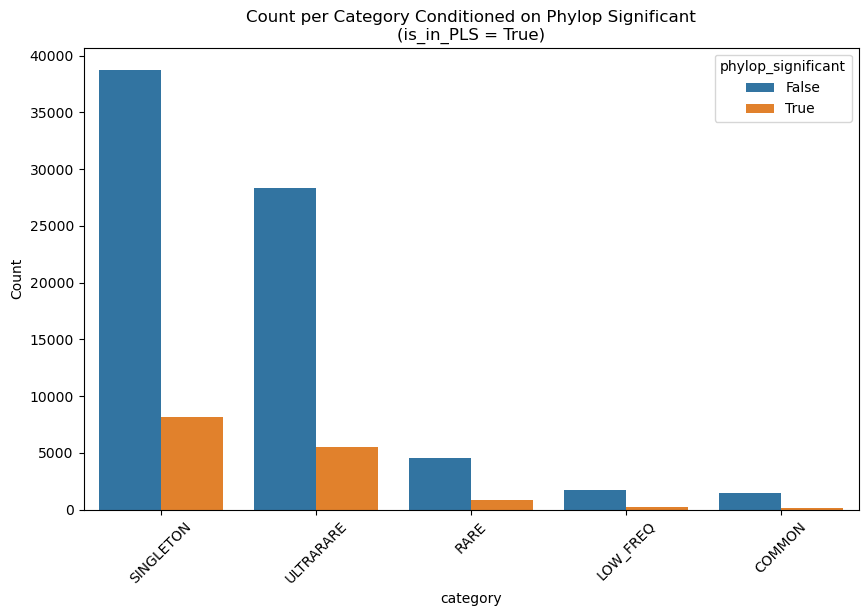

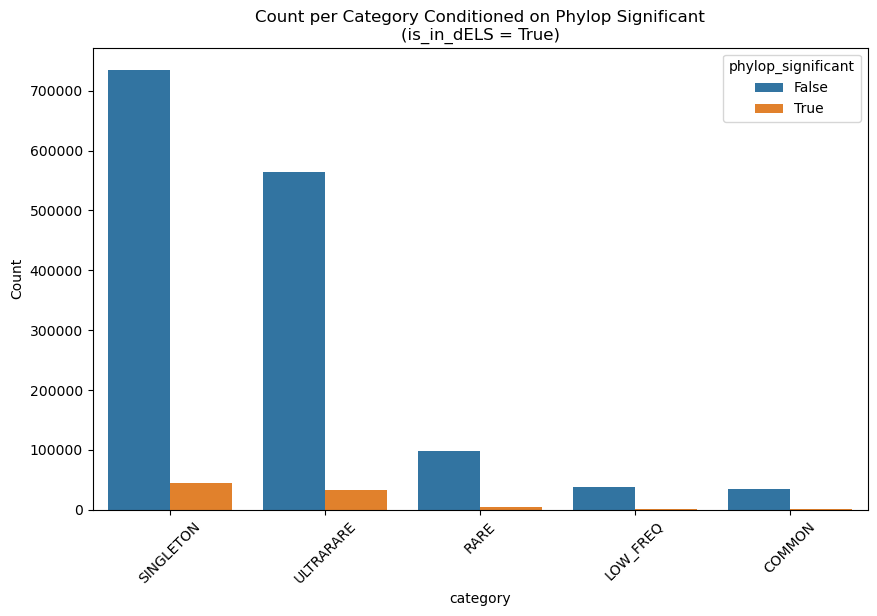

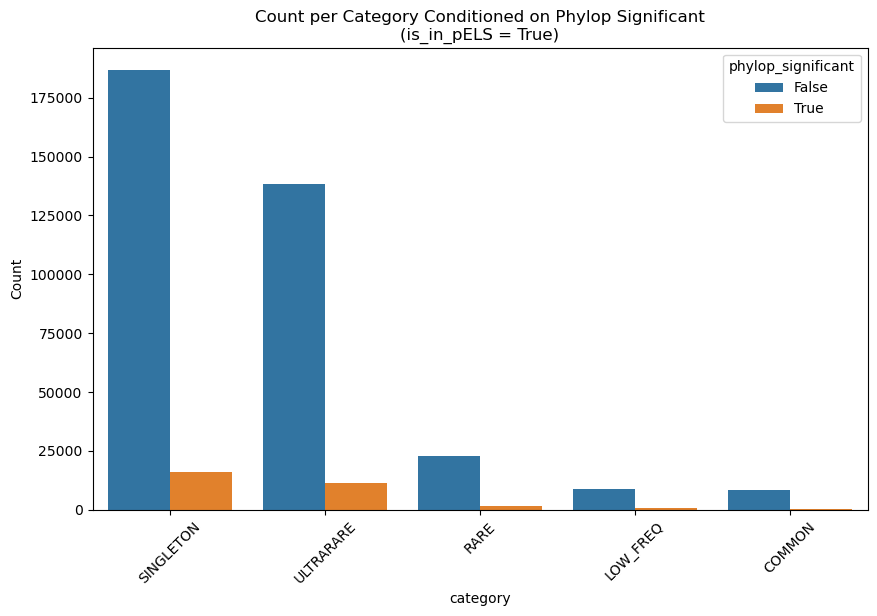

In [36]:
for var in genome_regions:
    plot_count_by_category(df, var,False)

/tmp/ipykernel_3982206/4144036898.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


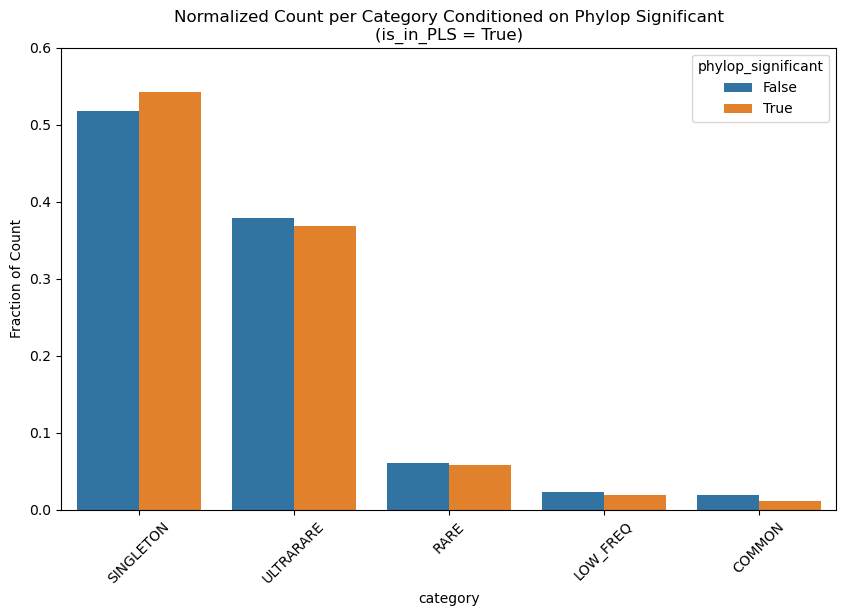

/tmp/ipykernel_3982206/4144036898.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


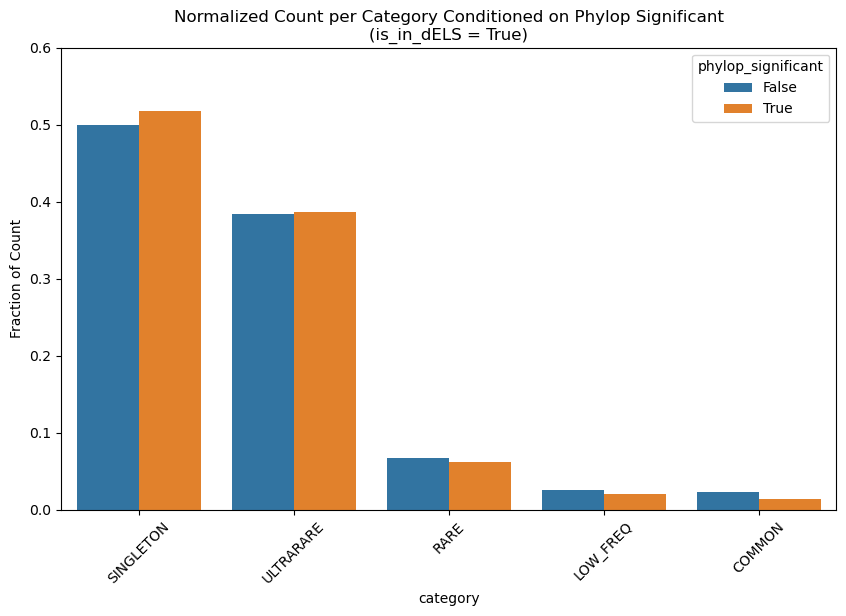

/tmp/ipykernel_3982206/4144036898.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


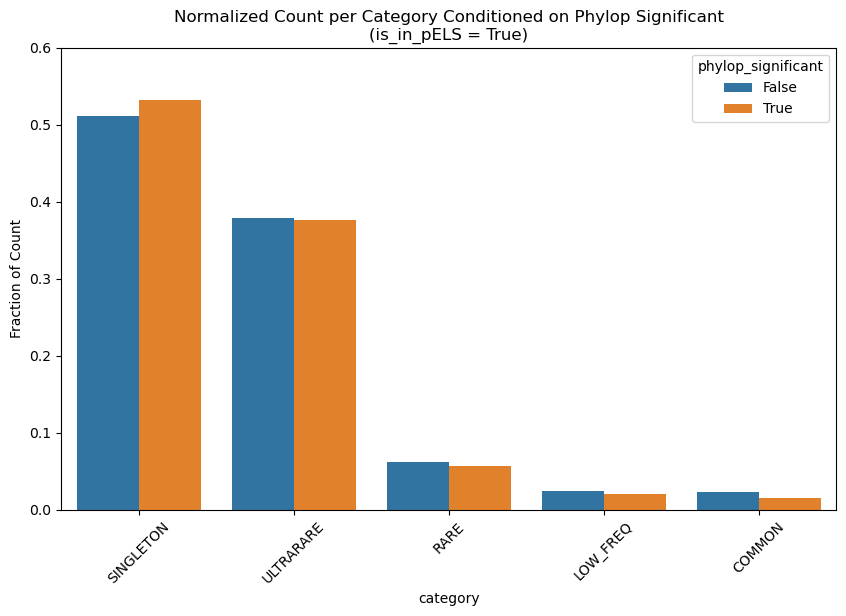

In [37]:
for var in genome_regions:
    plot_count_by_category(df, var,True)

In [38]:

def lump_rarity_categories(row):
    
    if row["category"] in ["SINGLETON","ULTRARARE","RARE"]:
        return "RARE"
    elif row["category"] == "COMMON" :
        return "COMMON"
    else:
        return "not_interesting"


def plot_fraction(df, genomic_region,to_plot):
    subset_df = df[df[genomic_region]]
    
    
    subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)
    
    subset_df=subset_df[subset_df["rarity_bin"]!="not_interesting"]
    
    total_counts = subset_df.groupby([to_plot,'rarity_bin'])['count'].sum().unstack()
    
    total_counts["ratio"]=total_counts["RARE"]/total_counts["COMMON"]
    
    plt.figure(figsize=(5, 5))
    
    sns.barplot(total_counts,y="ratio",x=to_plot)
    
    plt.xticks(rotation=45)
    
    plt.title(genomic_region)
    
    
    plt.show()
    

/tmp/ipykernel_3982206/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


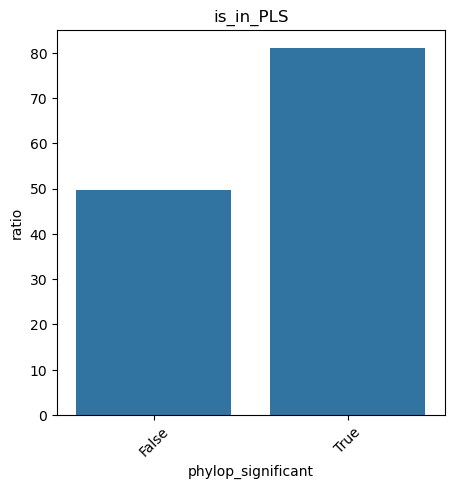

/tmp/ipykernel_3982206/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


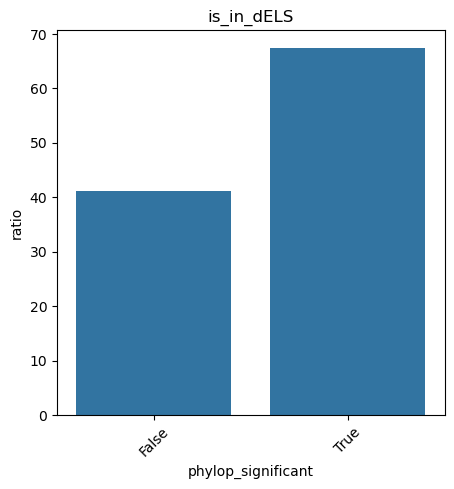

/tmp/ipykernel_3982206/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


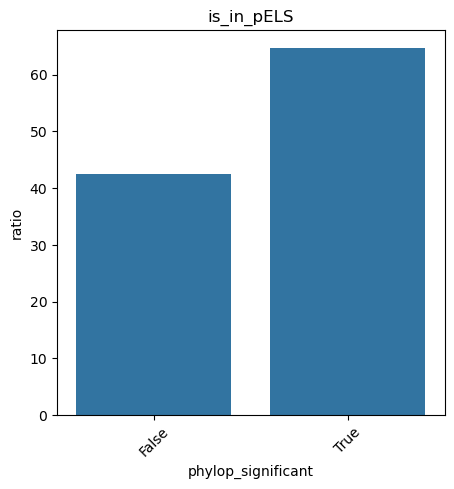

In [39]:
for var in genome_regions:
    plot_fraction(df, var,"phylop_significant")

## CADD vs rarity

load & munge data

In [40]:
#load
df_cadd = pd.read_csv(glob.glob(data_base_path+"CADD_count_table/*.csv")[0])

###convert the boolean "in CADD category" cutoff to "mosst strict CADD cutoff row is counting". 
x_columns = ["CADD>=10","CADD>=20","CADD>=30","CADD>=40","CADD>=50"][::-1]  
# We reverse the list so we check from right to left : from most to least strict
#picking the strictest category to call as our 

# Function to find the column with True value
def find_true_column(row, columns,default):
    return next((col for col in columns if row[col]), default)

# Apply the function to each row
df_cadd['CADD_category'] = df_cadd.apply(find_true_column, columns=x_columns, default='CADD<10', axis=1)

Define & run function to plot cadd counts by genomic location type

In [41]:
def plot_cadd_count_by_category(df, genomic_region,normalize):
    subset_df = df[df[genomic_region]]

    graph_version="none"
    
    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('CADD_category')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)

        
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
        graph_version="Fraction : noramlized so each CADD threshold sums to 1"
    else:
        value_col = 'count'
        ylabel = 'Count'
        graph_version="Count"


    plt.figure(figsize=(10, 6))
    sns.barplot(x='CADD_category', y=value_col, hue='category', data=subset_df,order=["CADD<10"]+x_columns[::-1],hue_order=rarity_order)
    plt.title(f"{'Normalized ' if normalize else ''}{graph_version}\n({genomic_region} = True)")
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.show()

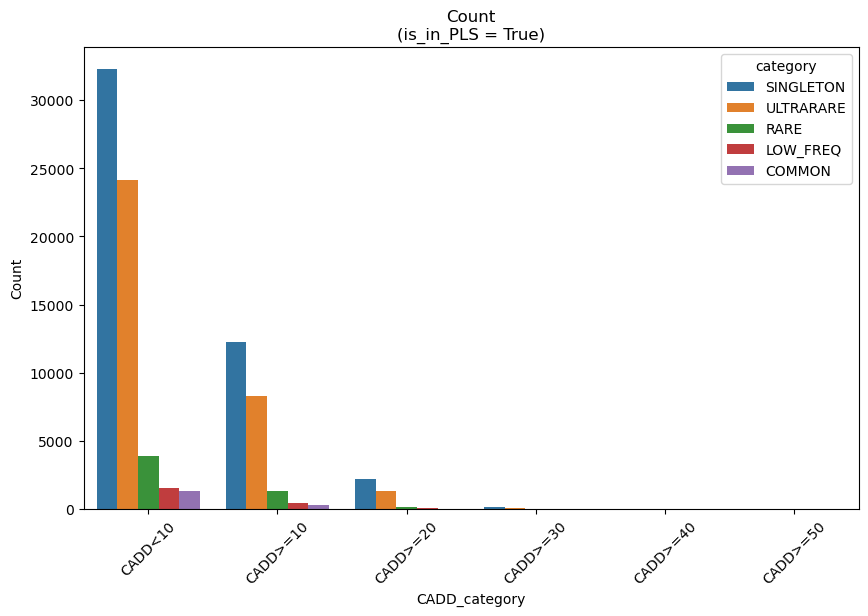

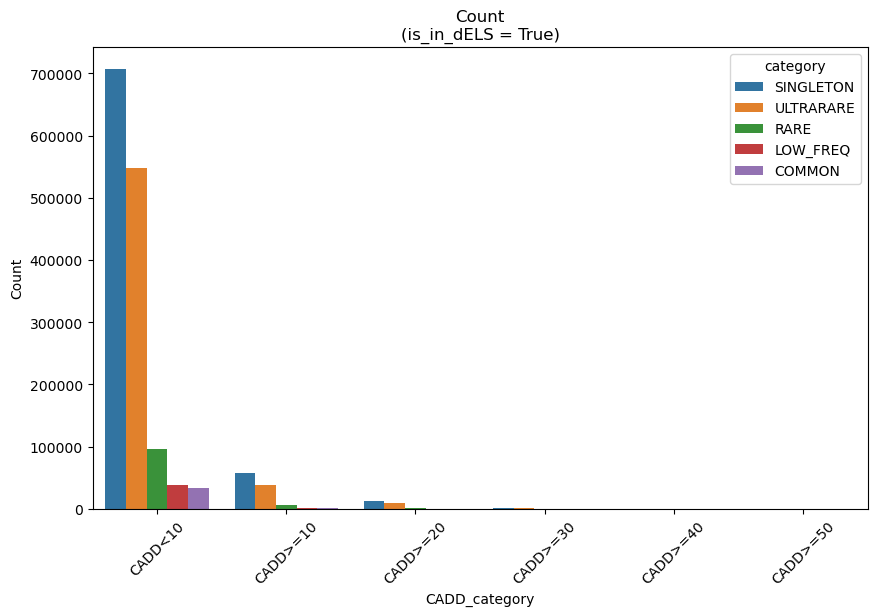

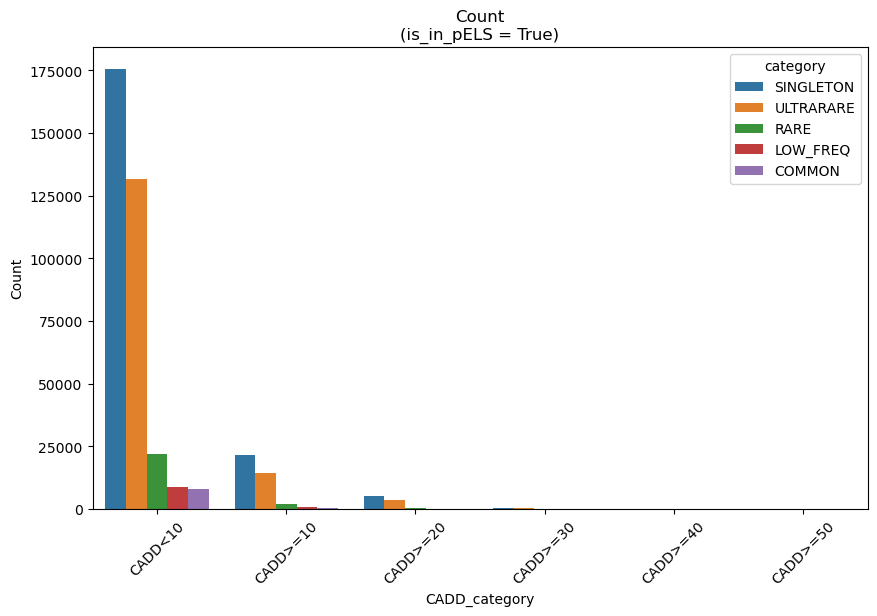

In [42]:
for var in genome_regions:
    plot_cadd_count_by_category(df_cadd, var,False)

/tmp/ipykernel_3962175/2789547196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


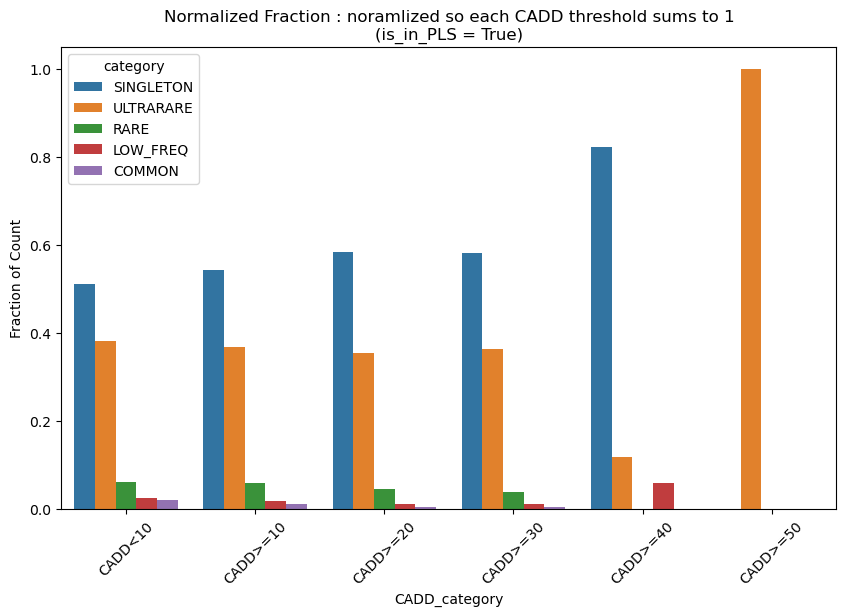

/tmp/ipykernel_3962175/2789547196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


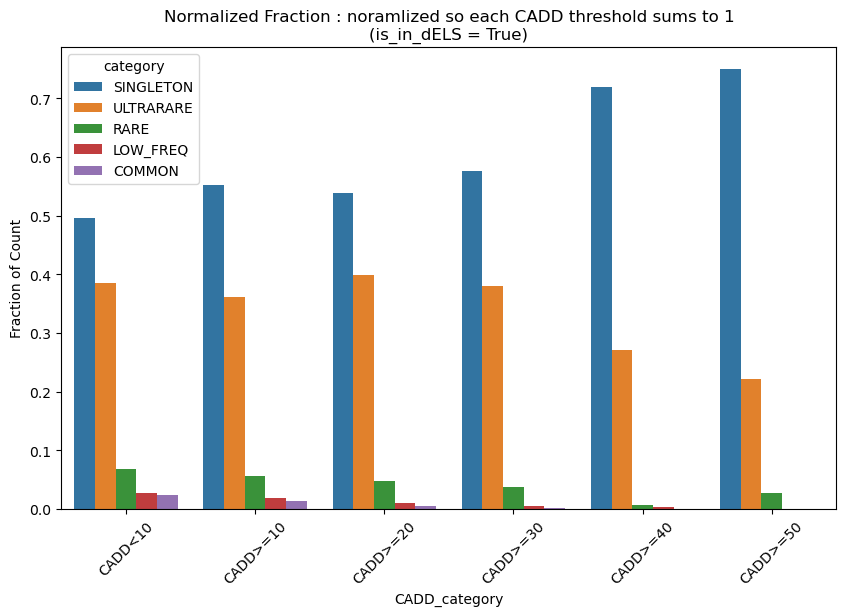

/tmp/ipykernel_3962175/2789547196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


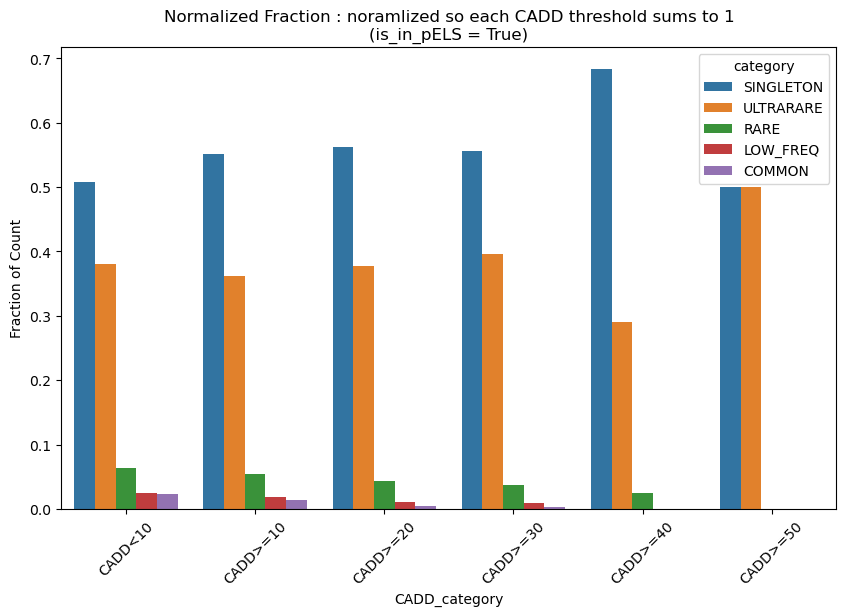

In [14]:
for var in genome_regions:
    plot_cadd_count_by_category(df_cadd, var,True)

Compute ratio rare over common. 

/tmp/ipykernel_3982206/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


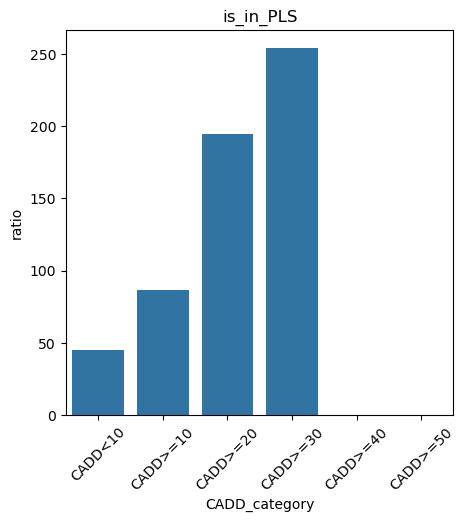

/tmp/ipykernel_3982206/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


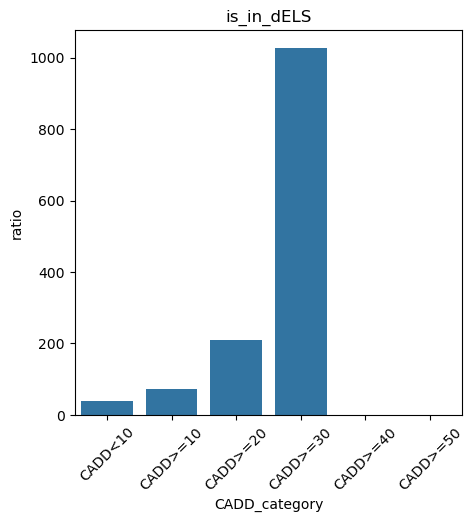

/tmp/ipykernel_3982206/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


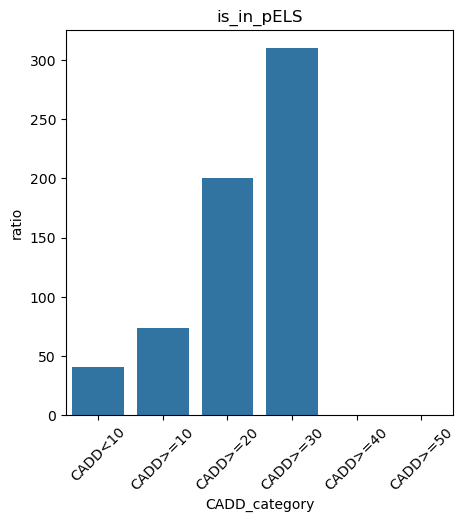

In [43]:
for var in genome_regions:
    plot_fraction(df_cadd,var,"CADD_category")

## Malinouis

In [44]:
df_mal = pd.read_csv(glob.glob(data_base_path+"malinouis_skew_and_thresh/*.csv")[0])

In [45]:

skew_columns=[]
ref_columns=[]
alt_columns=[]

for i in df_mal.columns:
    if "mean_skew" in i :
        skew_columns.append(i)
    elif "mean_ref" in i :
        ref_columns.append(i)
    elif "mean_alt" in i :
        alt_columns.append(i)

In [46]:
#fix the names
df_mal=df_mal.rename(columns={i:i.replace('^', ',').replace('&','.') for i in skew_columns+ref_columns+alt_columns})

In [47]:
skew_columns=[i.replace('^', ',').replace('&','.') for i in skew_columns]
ref_columns=[i.replace('^', ',').replace('&','.') for i in ref_columns]
alt_columns=[i.replace('^', ',').replace('&','.') for i in alt_columns]

In [48]:
df_mal['mean_skew'] = df_mal.apply(find_true_column, columns=skew_columns, default='Error', axis=1)
df_mal['mean_ref'] = df_mal.apply(find_true_column, columns=ref_columns, default='Error', axis=1)
df_mal["rarity_bin"]=df_mal.apply(lump_rarity_categories,axis=1)

In [49]:
def plot_2d(df, genomic_region,x,y,count_or_ratio):
    subset_df = df[df[genomic_region]]
    
    
    total_counts = subset_df.groupby([x,y,'rarity_bin'])['count'].sum().unstack()
    
    if count_or_ratio=="ratio":
        subset_df=subset_df[subset_df["rarity_bin"]!="not_interesting"]
        total_counts["ratio"]=total_counts["RARE"]/total_counts["COMMON"]
    elif count_or_ratio=="count":
        
        total_counts["count"]=total_counts[['COMMON','RARE','not_interesting']].sum(axis=1)
        
    
    
    plt.figure(figsize=(10, 10))
    
    pivot_table = total_counts.pivot_table(index='mean_skew', columns='mean_ref', values=count_or_ratio)#, aggfunc='mean'
    
    pivot_table = pivot_table.reindex(skew_columns[::-1], axis=0)
    pivot_table = pivot_table.reindex(ref_columns, axis=1)
    
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
    plt.title(f"{count_or_ratio}_{genomic_region}")
    plt.show()
    

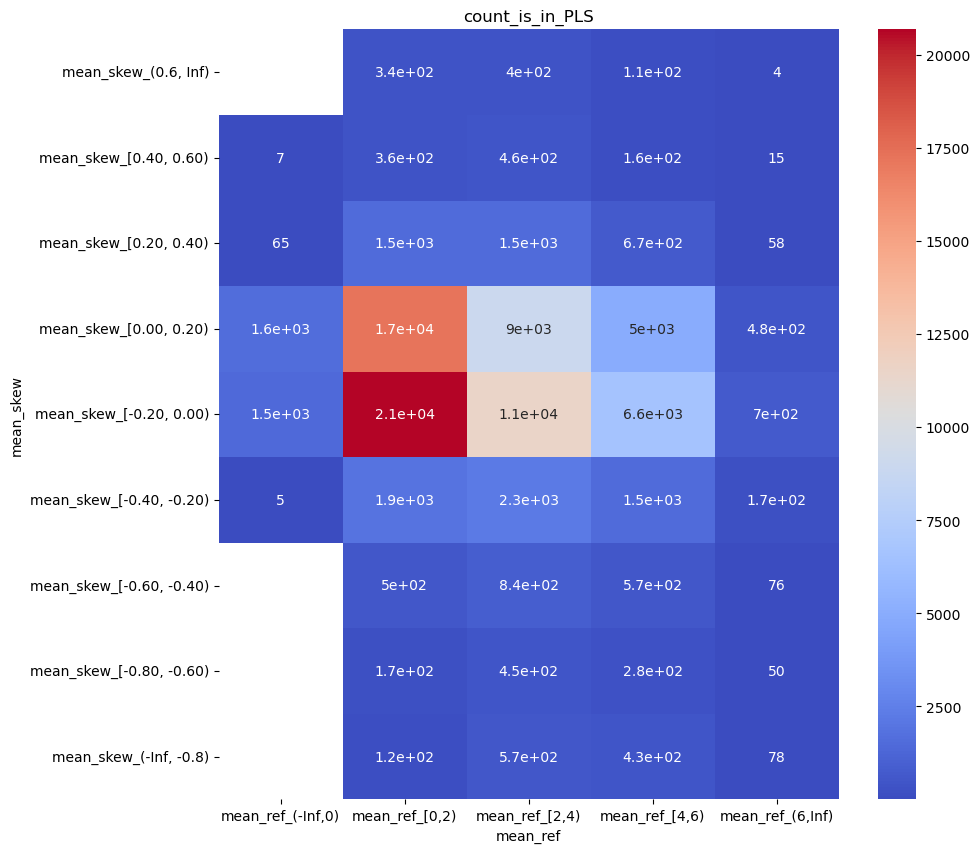

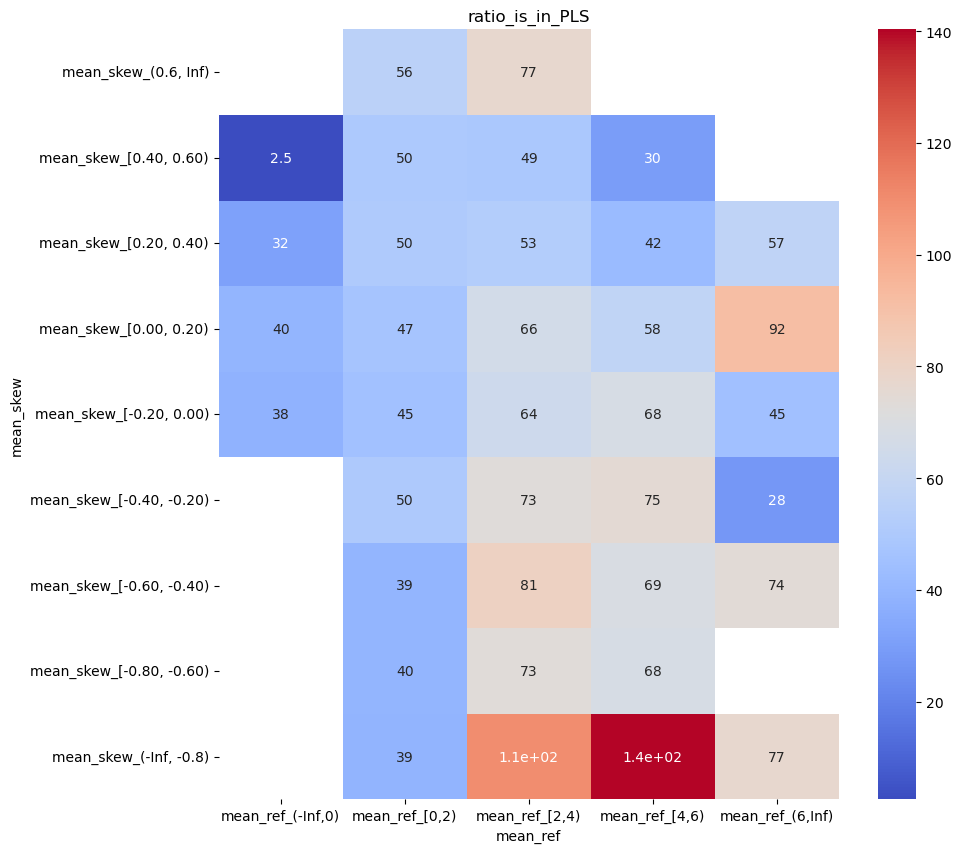

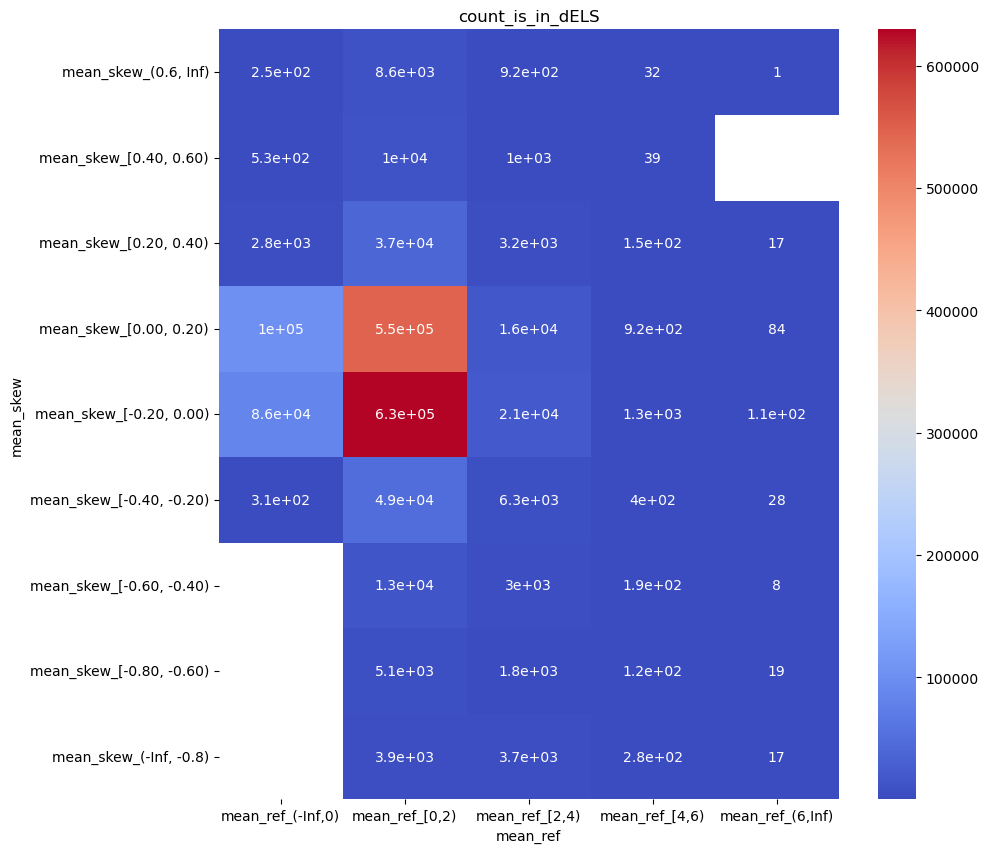

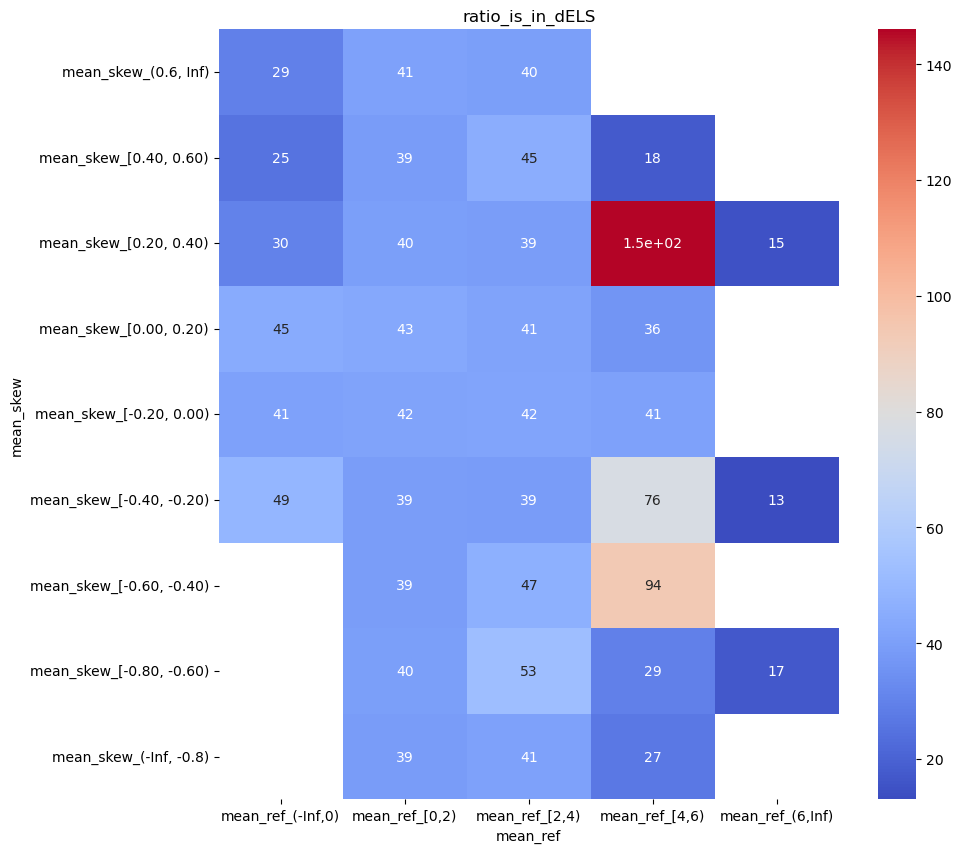

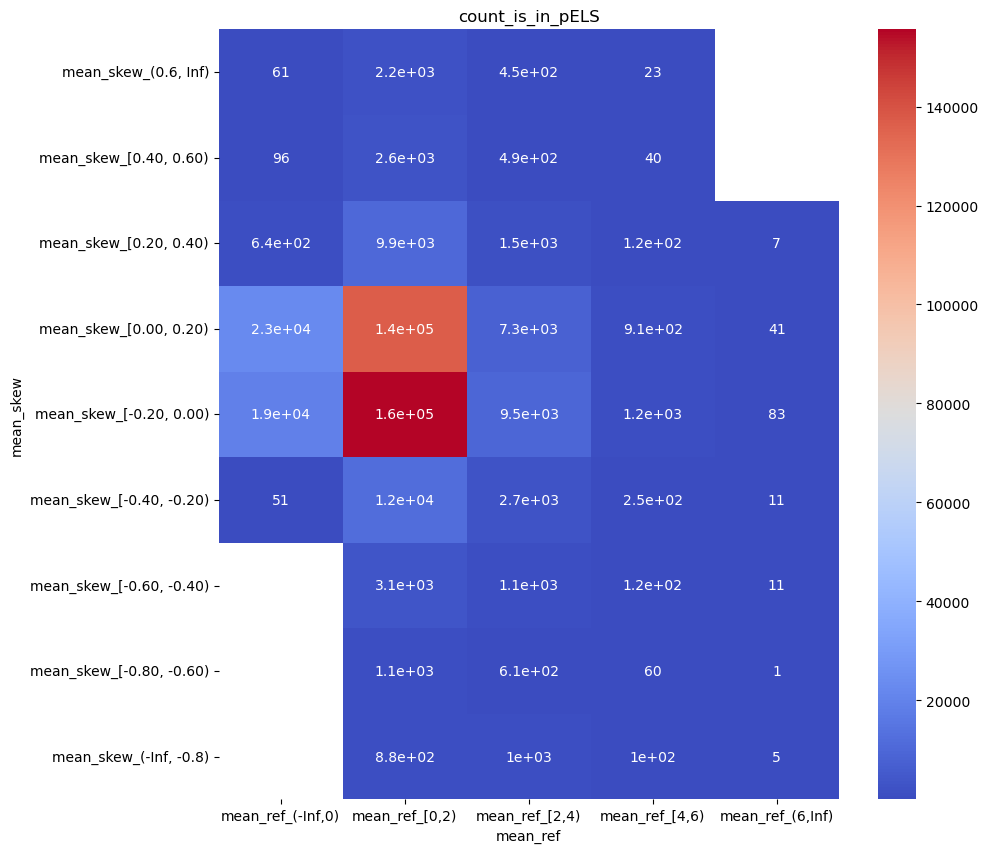

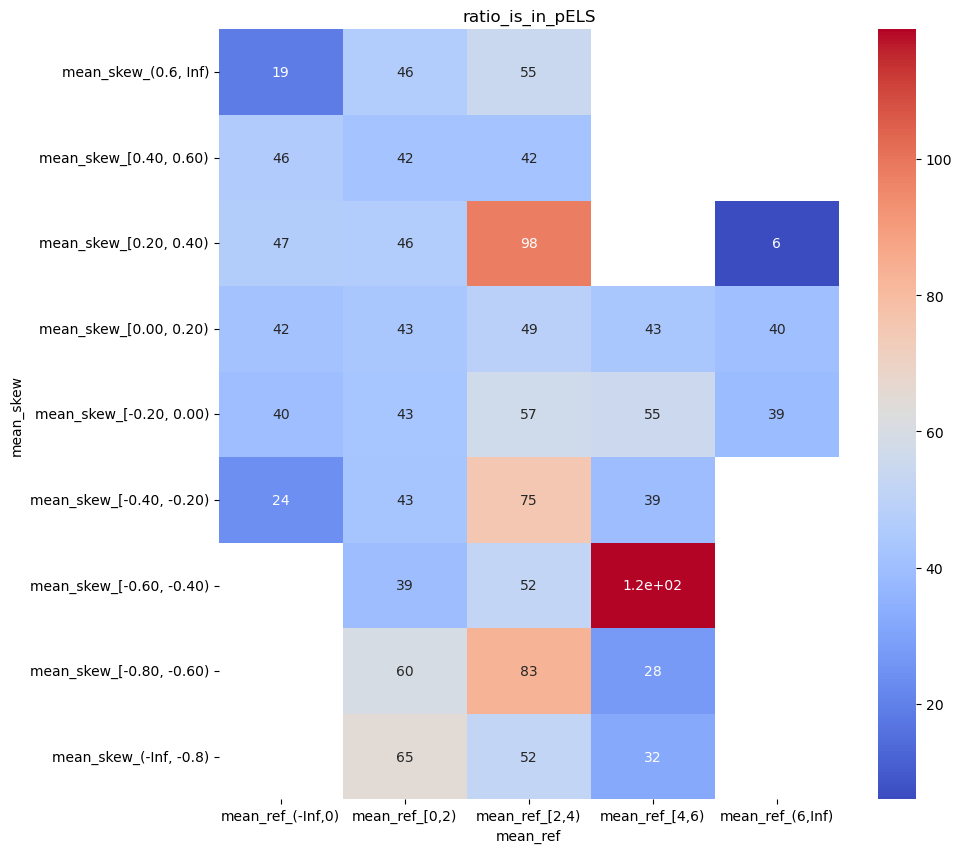

In [50]:
for var in genome_regions:
    plot_2d(df=df_mal,genomic_region=var,x="mean_skew",y="mean_ref",count_or_ratio="count")
    plot_2d(df=df_mal,genomic_region=var,x="mean_skew",y="mean_ref",count_or_ratio="ratio")


In [137]:
def plot_2d_on_1d(df, genomic_region,x,y):
    subset_df = df[df[genomic_region]]
    
    subset_df=subset_df[subset_df["rarity_bin"]!="not_interesting"]    
    
    total_counts = subset_df.groupby([x,y,'rarity_bin'])['count'].sum().unstack()

    total_counts["ratio"]=total_counts["RARE"]/total_counts["COMMON"]    
    total_counts=total_counts[total_counts[["COMMON","RARE"]].sum(axis=1)>300]
    
    hue_order=['mean_skew_(-Inf, -0.8)', 'mean_skew_[-0.80, -0.60)','mean_skew_[-0.60, -0.40)','mean_skew_[-0.40, -0.20)', 'mean_skew_[-0.20, 0.00)', 'mean_skew_[0.00, 0.20)', 'mean_skew_[0.20, 0.40)', 'mean_skew_[0.40, 0.60)', 'mean_skew_(0.6, Inf)']
    
    x_order=['mean_ref_(-Inf,0)','mean_ref_[0,2)', 'mean_ref_[2,4)', 'mean_ref_[4,6)', 'mean_ref_(6,Inf)']
    
    
    plt.figure(figsize=(10, 8))
    
    

    sns.barplot(total_counts, x="mean_ref",hue="mean_skew",y="ratio",hue_order=hue_order,order=x_order)
    plt.title(genomic_region)
    plt.show()

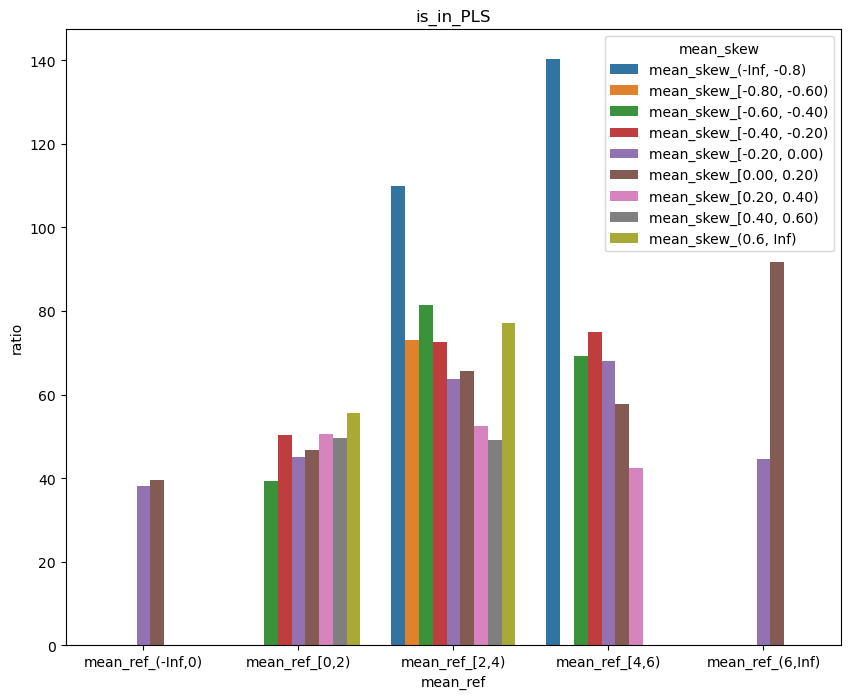

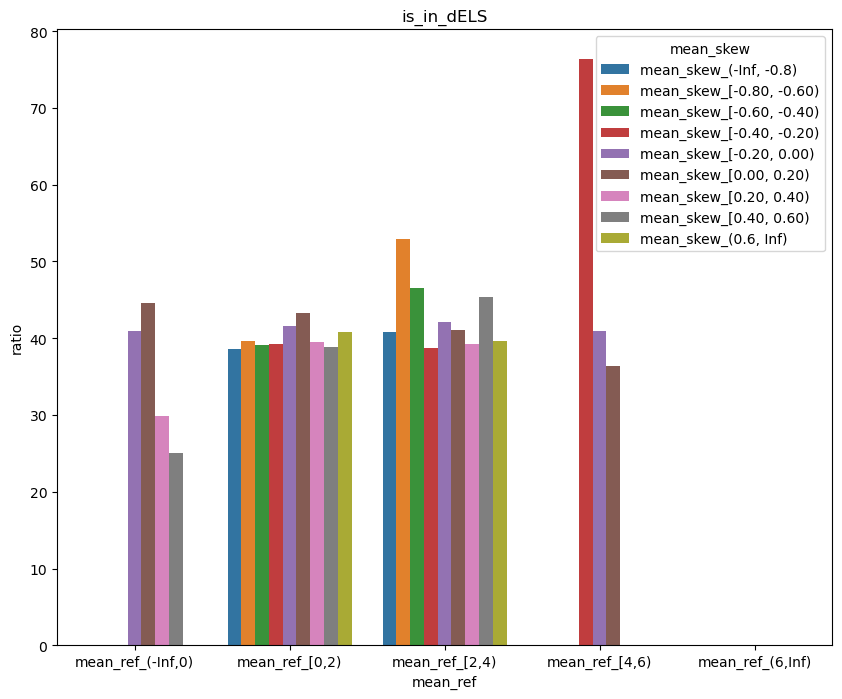

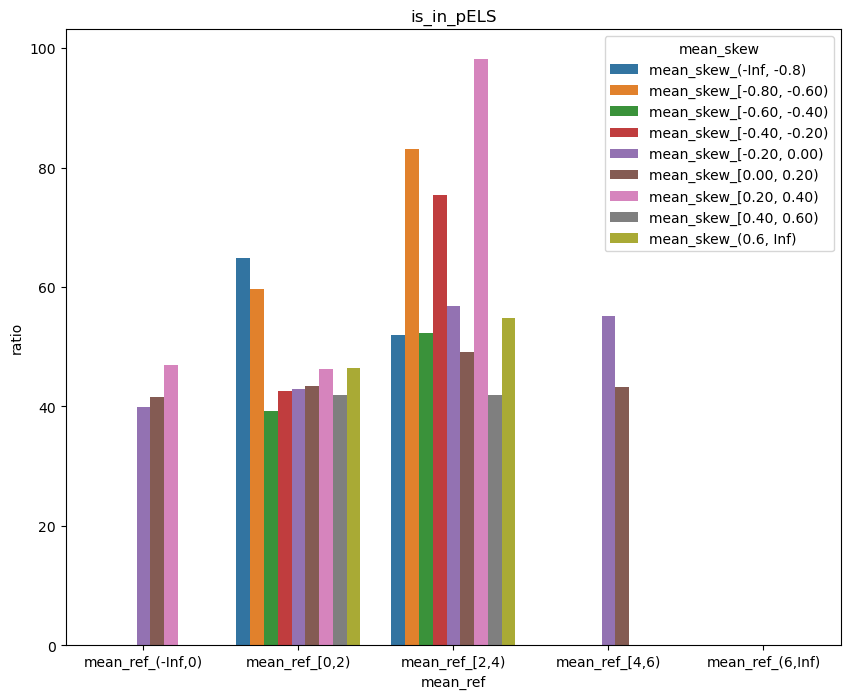

In [138]:
for var in genome_regions:
    plot_2d_on_1d(df=df_mal,genomic_region=var,x="mean_skew",y="mean_ref")